In [2]:
import pandas as pd 
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\PCCV\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('population_total.xlsx')
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,315k,314k,314k,314k,313k,313k,312k,312k,311k,310k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,54.5M,54.4M,54.3M,54.1M,54M,53.8M,53.7M,53.5M,53.4M,53.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,79.8M,79.8M,79.7M,79.7M,79.6M,79.5M,79.5M,79.4M,79.3M,79.2M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,74.4M,75.2M,76M,76.8M,77.6M,78.4M,79.2M,80M,80.8M,81.5M


In [5]:
df.isnull().values.any()

np.False_

In [6]:
df.duplicated().values.any()

np.False_

In [7]:
df1 = df.melt(id_vars=['country'], var_name='year', value_name='population')
df1

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


In [8]:
df1.to_csv('population_total.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     59297 non-null  object
 1   year        59297 non-null  object
 2   population  59297 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [10]:
df1['year'] = df1['year'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     59297 non-null  object
 1   year        59297 non-null  int64 
 2   population  59297 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
df1['population'] = df1['population'].replace({'M':'e6', 'k':'e3' , 'B':'e9'}, regex=True).astype(float)
df1

,country,year,population
0,Afghanistan,1800,3280000.0
1,Angola,1800,1570000.0
2,Albania,1800,400000.0
3,Andorra,1800,2650.0
4,United Arab Emirates,1800,40200.0
...,...,...,...
59292,Samoa,2100,310000.0
59293,Yemen,2100,53200000.0
59294,South Africa,2100,79200000.0
59295,Zambia,2100,81500000.0


In [12]:
yearly_pop = df1.groupby('year')['population'].sum()
yearly_pop.sort_values(ascending=False)

year
2100    1.086488e+10
2098    1.086331e+10
2097    1.085810e+10
2099    1.085769e+10
2096    1.085507e+10
            ...     
1804    9.974856e+08
1803    9.949540e+08
1802    9.915552e+08
1801    9.878949e+08
1800    9.844545e+08
Name: population, Length: 301, dtype: float64

In [13]:
print("The year with the highest population : ",yearly_pop.idxmax())
print("The year with the lowest population : ",yearly_pop.idxmin())

The year with the highest population :  2100
The year with the lowest population :  1800


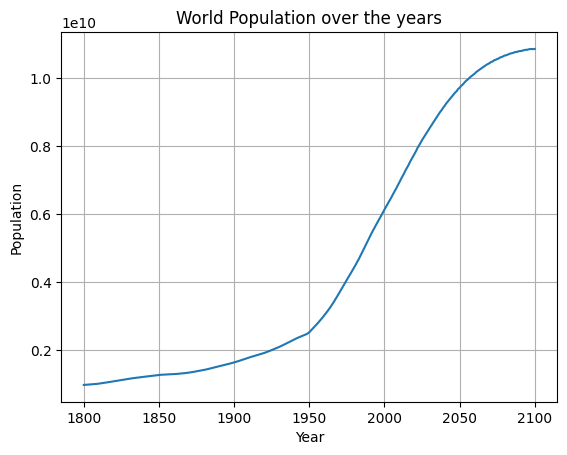

In [14]:
plt.plot(yearly_pop.index, yearly_pop.values)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population over the years')
plt.grid()
plt.show()

In [15]:
country_pop = df1.groupby('country')['population'].sum()
country_pop.sort_values(ascending=False)

country
China            2.406170e+11
India            2.245620e+11
United States    5.742322e+10
Nigeria          4.771280e+10
Indonesia        4.253380e+10
                     ...     
San Marino       5.560330e+06
Palau            3.130030e+06
Tuvalu           2.408400e+06
Nauru            1.643690e+06
Holy See         2.562510e+05
Name: population, Length: 197, dtype: float64

In [16]:
print("The country with the highest population : ",country_pop.idxmax()," --> ",country_pop.max())
print("The country with the Lowest population : ",country_pop.idxmin()," --> ",country_pop.min())

The country with the highest population :  China  -->  240617000000.0
The country with the Lowest population :  Holy See  -->  256251.0


In [17]:
df.columns = df.columns.astype(str)
df['1970'] = df['1970'].replace({'M':'e6', 'k':'e3', 'B':'e9'}, regex=True).astype(float)
df.loc[:, '1970'].sum()

np.float64(3696196839.0)

In [18]:
df['2071'] = df['2071'].replace({'M':'e6', 'k':'e3', 'B':'e9'}, regex=True).astype(float)
df.loc[:, '2071'].sum()

np.float64(10480929684.0)

In [19]:
df['2024'] = df['2024'].replace({'M':'e6', 'k':'e3', 'B':'e9'}, regex=True).astype(float)
world_pop = df.loc[:, '2024'].sum()
print("The world population in 2024 is :",world_pop)

The world population in 2024 is : 8102030403.0


In [20]:
china_pop = df1[df1['country'] == 'China']
china_pop_now = china_pop[china_pop['year']==2024]
CPN = china_pop_now['population'].values[0]
china_percentage = CPN/world_pop*100
print("The percentage of China's population in 2024 is :",china_percentage , "%")

The percentage of China's population in 2024 is : 18.02017429432744 %


In [21]:
russia_pop = df1[df1['country'] == 'Russia']
russia_pop_now = russia_pop[russia_pop['year']==2024]
RPN = russia_pop_now['population'].values[0]
russia_percentage = RPN/world_pop*100
print("The percentage of Russia's population in 2024 is :",russia_percentage , "%")

The percentage of Russia's population in 2024 is : 1.789674844299643 %


In [22]:
count_pop_2024 = df1[df1['year'] == 2024].groupby('country')[['population']].sum()
count_pop_2024.sort_values(by='population', ascending=False , inplace=True)

In [23]:
for c in count_pop_2024.index:
    country_pop = count_pop_2024.loc[c]
    CPN = country_pop['population']
    country_percentage = CPN / world_pop * 100
    if country_percentage > 3:
        print("The percentage of ", c, "'s population in 2024 is :", country_percentage, "%")

The percentage of  China 's population in 2024 is : 18.02017429432744 %
The percentage of  India 's population in 2024 is : 17.649896740334412 %
The percentage of  United States 's population in 2024 is : 4.184136360121235 %
The percentage of  Indonesia 's population in 2024 is : 3.50529417780068 %


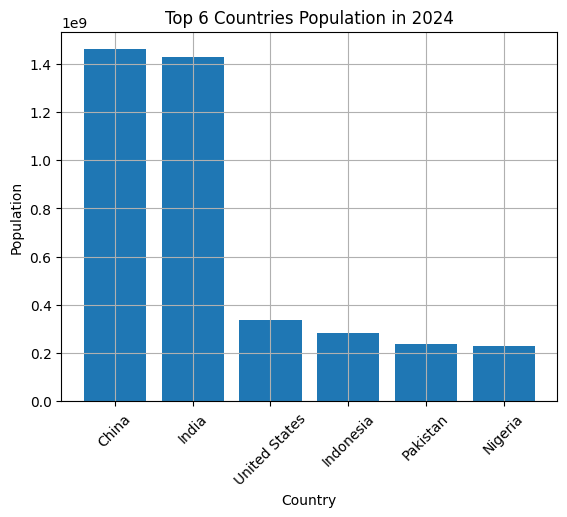

In [24]:
plt.bar(count_pop_2024.index[:6], count_pop_2024['population'][:6])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 6 Countries Population in 2024')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [25]:
count_pop_smallest = df1[df1['year'] == 2024].groupby('country')[['population']].sum()
count_pop_smallest.sort_values(by='population', ascending=True , inplace=True)

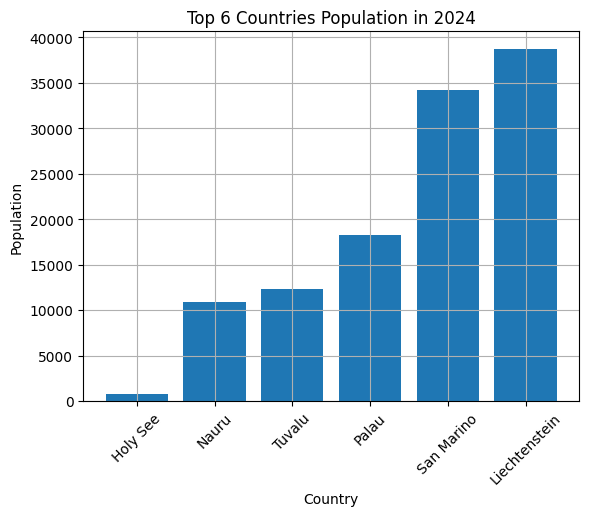

In [26]:
plt.bar(count_pop_smallest.index[:6], count_pop_smallest['population'][:6])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 6 Countries Population in 2024')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [27]:
growth_rate = df1.groupby('year')['population'].sum().pct_change()
growth_rate.sort_values(ascending=False)

year
1970    0.021051
1968    0.021007
1967    0.020971
1969    0.020550
1966    0.020360
          ...   
2097    0.000279
2091    0.000264
2095   -0.000086
2099   -0.000517
1800         NaN
Name: population, Length: 301, dtype: float64

Text(0, 0.5, 'Growth Rate')

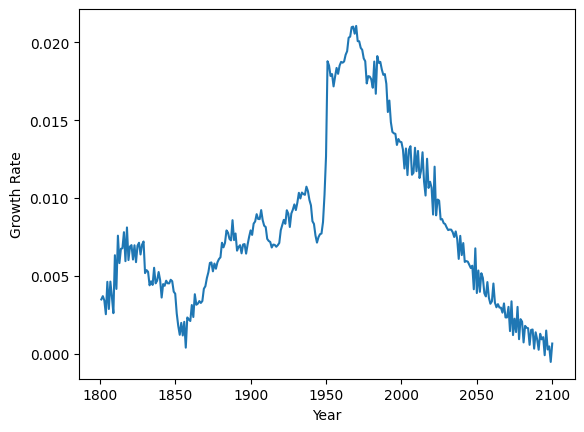

In [28]:
plt.plot(growth_rate.index, growth_rate.values)
plt.xlabel('Year')
plt.ylabel('Growth Rate')

In [29]:
print("The highest growth rate in year :",growth_rate.idxmax())
print("The Lowest growth rate in year :",growth_rate.idxmin())

The highest growth rate in year : 1970
The Lowest growth rate in year : 2099


In [31]:
df1['growth_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 59297 entries, 0 to 59296
Series name: growth_rate
Non-Null Count  Dtype  
--------------  -----  
59100 non-null  float64
dtypes: float64(1)
memory usage: 463.4 KB


In [32]:
count_pop = df1.groupby('country')[['population','year']].sum()
count_pop.sort_values(by='population', ascending=False)

,population,year
country,,
China,2.406170e+11,586950
India,2.245620e+11,586950
United States,5.742322e+10,586950
Nigeria,4.771280e+10,586950
Indonesia,4.253380e+10,586950
...,...,...
San Marino,5.560330e+06,586950
Palau,3.130030e+06,586950
Tuvalu,2.408400e+06,586950


In [33]:
count_pop_max = df1.groupby('country')[['population','year']].max()
count_pop_max.sort_values(by='population', ascending=False)

,population,year
country,,
India,1.650000e+09,2100
China,1.460000e+09,2100
Nigeria,7.330000e+08,2100
United States,4.340000e+08,2100
Pakistan,4.050000e+08,2100
...,...,...
San Marino,3.440000e+04,2100
Tuvalu,2.000000e+04,2100
Palau,1.990000e+04,2100


In [34]:
count_pop_min = df1.groupby('country')[['population','year']].min()
count_pop_min.sort_values(by='population', ascending=False)

,population,year
country,,
China,330000000.0,1800
India,201000000.0,1800
Russia,31300000.0,1800
France,29000000.0,1800
Japan,28000000.0,1800
...,...,...
Andorra,2650.0,1800
Tuvalu,2500.0,1800
Brunei,2260.0,1800


In [35]:
gr = ((count_pop_max['population'] / count_pop_min['population']) ** (1 / (count_pop_max['year'] - count_pop_min['year'])) - 1) * 100
gr.sort_values(ascending=False)


country
Hong Kong, China        2.023131
United Arab Emirates    1.946581
Qatar                   1.916199
Brunei                  1.811256
Singapore               1.806333
                          ...   
Ireland                 0.362044
Slovak Republic         0.312702
France                  0.282996
Czech Republic          0.236124
Holy See                0.115530
Length: 197, dtype: float64

In [36]:
print("Country with Highest growth rate over the years:",gr.idxmax())
print("Country with lowest growth rate over the years :",gr.idxmin())
print("maximum growth rate is :",gr.max())
print("minimum growth rate is :",gr.min())

Country with Highest growth rate over the years: Hong Kong, China
Country with lowest growth rate over the years : Holy See
maximum growth rate is : 2.0231311212317804
minimum growth rate is : 0.11552990887002679


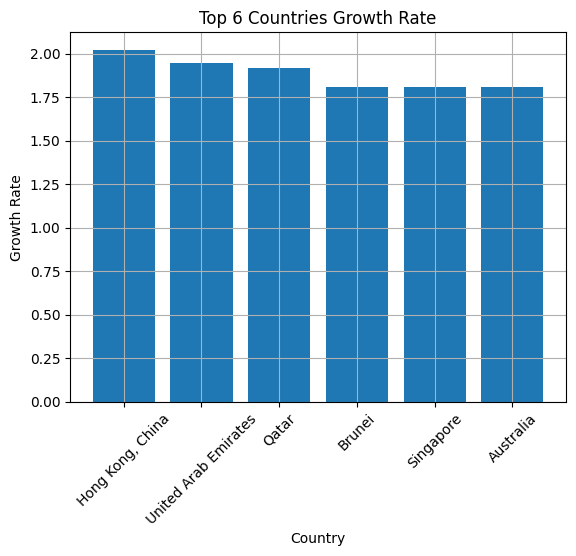

In [47]:

sorted_indices = np.argsort(gr.values)[::-1][:6]
plt.bar(gr.index[sorted_indices], np.sort(gr.values)[::-1][:6])
plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.title('Top 6 Countries Growth Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

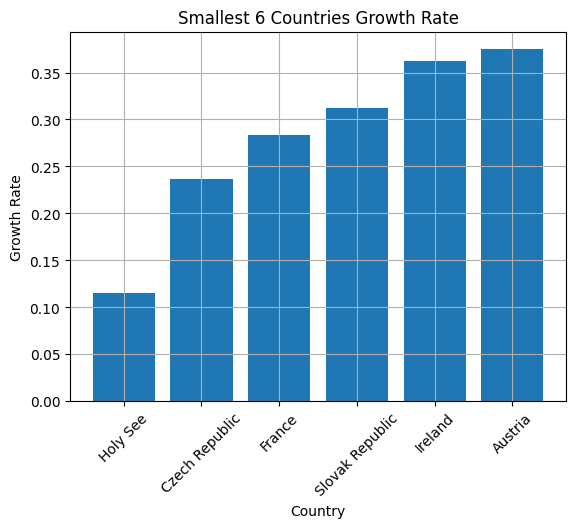

In [50]:

sorted_indices_smallest = np.argsort(gr.values)[:6]
plt.bar(gr.index[sorted_indices_smallest], np.sort(gr.values)[:6])
plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.title('Smallest 6 Countries Growth Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [37]:
year_gr_max = df1.groupby('year')['population'].max()
year_gr_min = df1.groupby('year')['population'].min()
year_gr = ((year_gr_max / year_gr_min) ** (1 / (year_gr_max.index.max() - year_gr_min.index.min())) - 1) * 100
year_gr.sort_values(ascending=False)
print("The year with the highest growth rate is :",year_gr.idxmax())
print("The year with the lowest growth rate is :",year_gr.idxmin())

The year with the highest growth rate is : 2071
The year with the lowest growth rate is : 1800


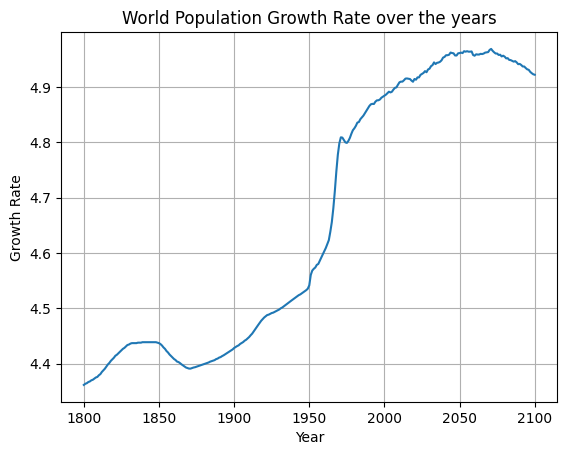

In [38]:
plt.plot(year_gr.index, year_gr.values)
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('World Population Growth Rate over the years')
plt.grid()